In [ ]:
# 股票的话我可以计算了之后再筛选每半年前800
# 这样就保证动作维数一致了 
# 或者难道再对比下
# 但是这样，怎么改DQNnet呢，
# 之前的监督学习一直都是分开算的，我也就分开算好了

In [143]:
import pandas as pd 
import numpy as np 
import pickle
import matplotlib.pyplot as plt
from datetime import datetime

In [144]:
with open('hqa300_RL_transf_label1_gamma0.95_v2/rolling1990-12-19/pred.pkl.test017','rb')as f: # 
    pred1=pickle.load(f)
# pred1.columns = ['score1','label1']

In [145]:
pred11 = pred1.reset_index()

In [146]:
pred1.shape

(1322, 2)

In [147]:
(pred1['action']==0).sum(),(pred1['action']==1).sum(),(pred1['action']==2).sum()
# 0,1 分别代表 sell，buy
# 0,1,2 分别代表 buy,noact,sell,即 1,0,-1

(1063, 259, 0)

In [148]:
# pred11.loc[:,'xt'] = 0

In [149]:
pred11['datetime'] = pd.to_datetime(pred11['datetime'] )

In [150]:
# tc = 5e-4
# for i in range(len(pred11)):
#     if pred11.loc[i,'xt'] == 0 and pred11.loc[i,'action'] == 1 :
#         pred11.loc[i,'reward'] = (1-tc)*pred11.loc[i,'label']  - tc
#         pred11.loc[i+1,'xt'] == 1
#     elif pred11.loc[i,'xt'] == 0 and pred11.loc[i,'action'] ==0 :
#         pred11.loc[i,'reward'] = -pred11.loc[i,'label']  
#     elif pred11.loc[i,'xt'] == 1 and pred11.loc[i,'action'] == 0 :
#         pred11.loc[i,'reward'] = -(1-tc)*pred11.loc[i,'label']  - tc
#         pred11.loc[i+1,'xt'] == 0 
#     elif pred11.loc[i,'xt'] == 1 and pred11.loc[i,'action'] ==1 :
#         pred11.loc[i,'reward'] = pred11.loc[i,'label']  

In [151]:
# df_all = pred1.reset_index()  #pd.merge(pred1.reset_index(), pred5.reset_index()) # #  #pred5.reset_index() #
# df_all['datetime'] = pd.to_datetime(df_all['datetime'] )
# df_all= df_all.set_index(['instrument','datetime'])

In [152]:
scores = 'action'  #'score1' # 'normscore'  # 
labels = 'label'
yuzhi = 0.0
df_all = pred11.copy()
top_800_stocks = df_all.copy()
low_800_stocks = df_all.copy()
stocks_shaixuan = df_all.copy()
stocks_shaixuan[scores] = df_all[scores].apply(lambda x: -1 if x ==0 else x)
# stocks_shaixuan[scores] = df_all[scores].apply(lambda x: 0 if x < yuzhi and x> -yuzhi  else x)
top_800_stocks[scores] = df_all[scores].apply(lambda x: 0 if x <= yuzhi else x)
low_800_stocks[scores] = df_all[scores].apply(lambda x: -1 if x ==0 else 0)
top_800_stocks['Ref'] = np.sign(top_800_stocks[scores]) * top_800_stocks[labels]
low_800_stocks['Ref'] = np.sign(low_800_stocks[scores]) * low_800_stocks[labels]
stocks_shaixuan['Ref'] = np.sign(stocks_shaixuan[scores]) * stocks_shaixuan[labels]

In [153]:
# 计算得分的符号乘以标签的值
def cal_cumsum(top_800_stocks):
    daily_scores_sum = top_800_stocks.groupby('datetime')['Ref'].mean().reset_index() #sum？
    daily_scores_sum['TIR'] = daily_scores_sum['Ref'].cumsum()
    return daily_scores_sum

In [154]:
daily_scores_sum_top = cal_cumsum(top_800_stocks)
daily_scores_sum_low = cal_cumsum(low_800_stocks)
all_score = cal_cumsum(stocks_shaixuan)

In [155]:
labels = 'label'
def cal_cumsum_hold(top_800_stocks):
    daily_scores_sum = top_800_stocks.groupby('datetime')[labels].mean().reset_index()
    daily_scores_sum['TIR'] = daily_scores_sum[labels].cumsum()
    return daily_scores_sum
daily_scores_sum_hold = cal_cumsum_hold(df_all)

Text(0.5, 1.0, 'all label1')

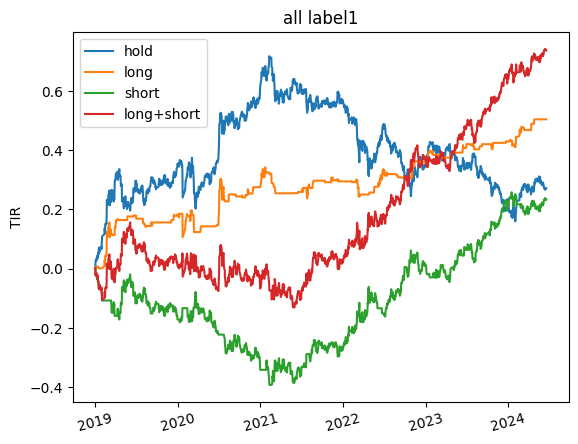

In [156]:
# plt.plot(xh,daily_scores_sum_low['TIR']-daily_scores_sum_hold['TIR'],label='short-hold')

plt.plot(daily_scores_sum_hold['datetime'],daily_scores_sum_hold['TIR'],label='hold')
plt.plot(daily_scores_sum_top['datetime'],daily_scores_sum_top['TIR'],label='long')
plt.plot(daily_scores_sum_low['datetime'],daily_scores_sum_low['TIR'],label='short')

# plt.plot(daily_scores_sum_hold['datetime'],daily_scores_sum_top['TIR']-daily_scores_sum_hold['TIR'],label='long-hold')

plt.plot(all_score['datetime'],all_score['TIR'],label='long+short')
# plt.plot(pred11['datetime'],pred11['TIR'],label='long+short')
plt.legend(loc='best', fontsize = 10)
plt.xticks(rotation=15)
plt.ylabel('TIR')
plt.title('all label1')
# mean, 标准化

Text(0.5, 1.0, '300 label1')

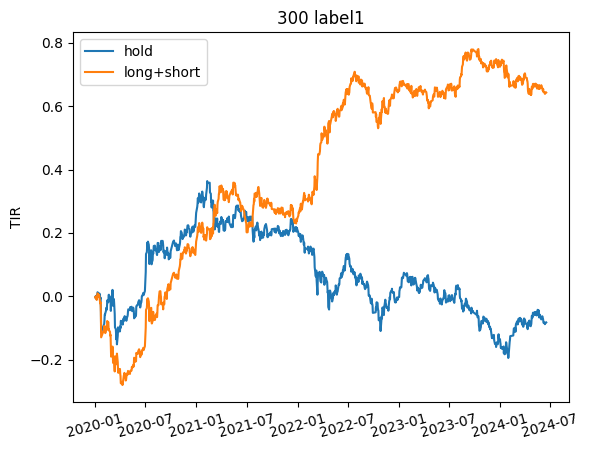

In [55]:
# plt.plot(xh,daily_scores_sum_low['TIR']-daily_scores_sum_hold['TIR'],label='short-hold')
plt.plot(pred11['index'],pred11['hold'],label='hold')
# plt.plot(pred11['index'],pred11['TIR'],label='long')
# plt.plot(pred11['index'],pred11['TIR'],label='short')

# plt.plot(daily_scores_sum_hold['datetime'],daily_scores_sum_top['TIR']-daily_scores_sum_hold['TIR'],label='long-hold')

plt.plot(pred11['index'],pred11['TIR'],label='long+short')
plt.legend(loc='best', fontsize = 10)
plt.xticks(rotation=15)
plt.ylabel('TIR')
plt.title('300 label1')
# mean, 标准化